### NeuroLoops: Exploring Feedback Loops in _C. elegans_
This project explores the role of feedback circuits in the nervous system of _C. elegans_ using the connectivity graphs in the [WormAtlas](http://www.wormatlas.org/) database.  Special thanks to Russ Poldrack for notebook starter code in his [Brain Networks Course](https://github.com/BrainNetworksCourse).

In [1]:
import pandas,numpy
import os,sys
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats

from brainnetworks.utils import mk_random_graph

%matplotlib inline

# read the data from Wormatlas.org: see section 2.1 of http://www.wormatlas.org/neuronalwiring.html for details

celegans_connectome=pandas.read_excel('http://www.wormatlas.org/images/NeuronConnect.xls')

# set up the graph
G = nx.DiGraph()
for i in celegans_connectome.index:
    G.add_edge(celegans_connectome.loc[i]['Neuron 1'],celegans_connectome.loc[i]['Neuron 2'])

# the graph has two connected components, so we will just keep the giant component
G = nx.DiGraph(G)  # Un-freeze the graph
G.remove_node('NMJ')  # Remove neuromuscular junction "node"
components=sorted(nx.weakly_connected_components(G), key=len, reverse=True)
G=nx.DiGraph(G.subgraph(components[0]))


### Intro: Visualizing the Connectome
We start by 

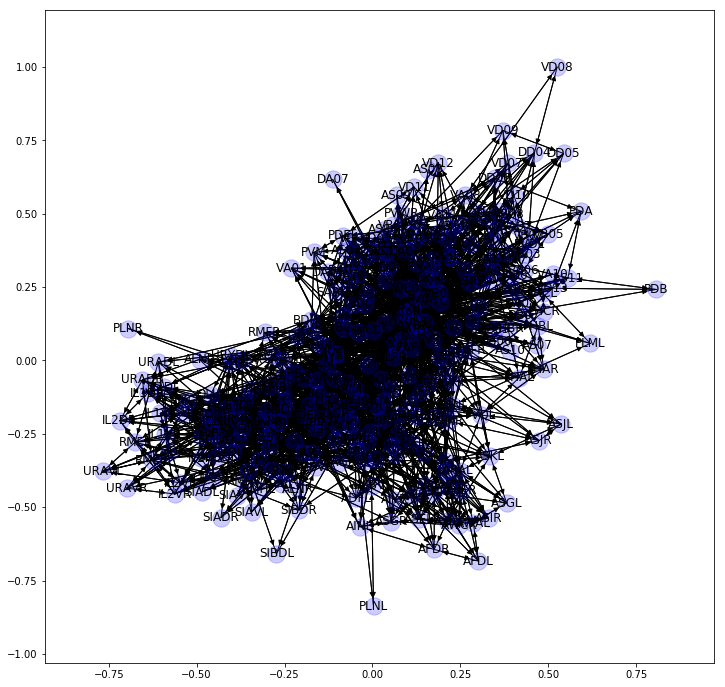

In [2]:
# Build plot
plt.figure(figsize=(12,12))
edge_expansion=12
node_expansion=30

layout = nx.spring_layout(G)
#weights=nx.get_edge_attributes(G,'weight')
_=nx.draw_networkx_edges(G,pos=layout, )
#                      width=[weights[i]*edge_expansion for i in G.edges],alpha=0.3)
_=nx.draw_networkx_nodes(G,pos=layout,
                         node_color='blue',
                         alpha=0.2,)
                        #node_size=[G.out_degree[i]*node_expansion for i in G.nodes]*node_expansion)
_=nx.draw_networkx_labels(G,pos=layout)

# Finding Cycles

In [ ]:
cycles = [c for c in nx.simple_cycles(G)]

In [ ]:
plt.figure(figsize=(12,120))
cycle_lengths = [len(c) for c in cycles]
plt.hist(cycle_lengths)

Mean = 17.11743772241993
Maximum = 115


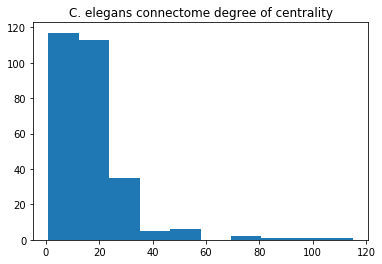

In [2]:
# Calculate degrees for each node
ce_degrees = [G.degree[i] for i in G.nodes]

# Calculate mean and max
ce_meandegree = numpy.mean(ce_degrees)
ce_maxdegree = numpy.max(ce_degrees)

# Plot and print
plt.title('C. elegans connectome degree of centrality')
plt.hist(ce_degrees)
print('Mean = {}'.format(ce_meandegree))
print('Maximum = {}'.format(ce_maxdegree))

b. Compute the average clustering coefficient for the connectome

In [3]:
ce_clustering = nx.average_clustering(G)
print(ce_clustering)

0.34604428028046025


c. Compute the average path length for the connectome

In [4]:
ce_avgpathlength = nx.average_shortest_path_length(G)
print(ce_avgpathlength)

2.324377224199288


#### Problem 2

First, use the provided code to create 100 random graphs with the same size as the C. Elegans connectome. For each graph, we compute its average clustering, average shortest path length, and maximum degree, and store those to a numpy array. (This may take a few minutes to run.)

In [5]:
# PROVIDED CODE
nruns=100
measures=['clustering','avgpathlength','maxdegree']
results=pandas.DataFrame(numpy.zeros((nruns,len(measures))),
                        columns=measures)

for i in range(nruns):
    G_rand = mk_random_graph(G)
    results.iloc[i]['clustering']=nx.average_clustering(G_rand)
    results.iloc[i]['avgpathlength']=nx.average_shortest_path_length(G_rand)
    results.iloc[i]['maxdegree']=numpy.max([G_rand.degree[i] for i in G_rand.nodes])


a.  Compute the tail probability of the observed values of cluster and path length for the C. elegans network, in comparison to the random network results.  That is, what is the probability of a value as or more extreme than the observed value wihtin the random graph distribution? You may find the function ```scipy.stats.percentileofscore()``` useful for this purpose.

In [6]:
### PROVIDED CODE: 

p_clustering= scipy.stats.percentileofscore(results['clustering'], ce_clustering)
print('Clustering  | Observed:',ce_clustering,'Random:',results['clustering'].mean(),'P<',p_clustering)

p_avgpathlength= scipy.stats.percentileofscore(results['avgpathlength'], ce_avgpathlength)
print('Path length | Observed:',ce_avgpathlength,'Random:',results['avgpathlength'].mean(),'P<',p_avgpathlength)

p_maxdegree= scipy.stats.percentileofscore(results['maxdegree'], ce_maxdegree)
print('Max degree  | Observed:',ce_maxdegree,'Random:',results['maxdegree'].mean(),'P<',p_maxdegree)


# print('            | Observed   | P Mean     | P Max      | P Min      | Probability |')
# print('Clustering  | {ce:<11f}| {mean:<11f}| {max:<11f}| {min:<11f}| {prob:<12f}|'.format(ce=ce_clustering,
#         mean=results['clustering'].mean(), max=max(results['clustering']),
#         min=min(results['clustering']), prob=p_clustering  ))
# print('Path length | {ce:<11f}| {mean:<11f}| {max:<11f}| {min:<11f}| {prob:<12f}|'.format(ce=ce_avgpathlength,
#         mean=results['avgpathlength'].mean(), max=max(results['avgpathlength']),
#         min=min(results['avgpathlength']), prob=p_avgpathlength    ))
# print('Max degree  | {ce:<11f}| {mean:<11f}| {max:<11f}| {min:<11f}| {prob:<12f}|'.format(ce=ce_maxdegree,
#         mean=results['maxdegree'].mean(), max=max(results['maxdegree']),
#         min=min(results['maxdegree']), prob=p_maxdegree ))


Clustering  | Observed: 0.34604428028046025 Random: 0.061537835728504714 P< 100.0
Path length | Observed: 2.324377224199288 Random: 2.2689514489069644 P< 100.0
Max degree  | Observed: 115 Random: 29.63 P< 100.0


Based on the results of this analysis, do you think that the C. Elegans connectome is a "small world" network"? explain your answer.

ANSWER:
> Overall, I believe that it is a small world network.  The clustering value of C. elegans is almost 6 times higher than those of the random graphs, and the maximum degree is almost 4 times higher than that of the average random graph.  Both of these traits are spot-on for small world networks.  The average path length in C. elegans is slightly above the average path length of random graphs, which is contradictory to C. elegans being a small world network, but it still seems that C. elegans is likely a small world network.

### Problem 3:

Determine which neuron is the most important based on these four criteria:

- degree centrality
- betweenness centrality
- closeness centrality
- eigenvector centrality

Because networkx returns a dictionary when it computes centrality measures, we have provided a utility function to return the entry with the largest value.

In [8]:
### PROVIDED CODE

def get_max_from_dict(d):
    """
    return the dict entry with the max value
    after https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
    """
    return max(d, key=lambda key: d[key])

central_nodes={}
# compute degree centrality
central_nodes['degree']=get_max_from_dict(nx.degree_centrality(G))
# compute eigenvector centrality
central_nodes['eigenvector']=get_max_from_dict(nx.eigenvector_centrality(G))
# compute betweenness centrality
central_nodes['betweenness']=get_max_from_dict(nx.betweenness_centrality(G))
# compute closeness centrality
central_nodes['closeness']=get_max_from_dict(nx.closeness_centrality(G))

# print('degree',nx.degree_centrality(G)['NMJ'],
#       '\neigenvector',nx.eigenvector_centrality(G)['AVAR'],
#       '\nbetweenness',nx.betweenness_centrality(G)['NMJ'],
#       '\ncloseness',nx.closeness_centrality(G)['NMJ'])

print(central_nodes)

{'degree': 'NMJ', 'eigenvector': 'AVAR', 'betweenness': 'NMJ', 'closeness': 'NMJ'}


You should see that the most central node differs between the different measures.  Given what you know about those measures, explain why this might be the case.

ANSWER:

> The `NMJ` neuron seems to be the most important in C. elegans by means of degree, betweenness, and closeness centrality.  However, `AVAR` is the most important neuron according to eigenvector centrality.
> - Degree centrality: `NMJ` has the highest number of edges connecting to it.
> - Eigenvector centrality: `AVAR` has the highest degree after degrees have been weighted by the degrees of their neighbors.
> - Betweenness centrality: `NMJ` has the most shortest paths going through it, meaning that `NMJ` probably mediates a lot of information flow between disparate regions.
> - Closeness centrality: `NMJ` is the closer to all other neurons than anything else, probably as a result of the sheer number of connections it has.
>
> In conclusion, I think that `NMJ` is probably the most import neuron in the network because it is generally the most connected.  However `AVAR` might have more influence on the network as a whole than `NMJ` because its connections seem to be better connected locally.